# Home Assignment No. 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [ ]:
import numpy as np
import math 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import xgboost
from xgboost import plot_importance

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, average_precision_score, plot_roc_curve
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time

import warnings
warnings.filterwarnings('ignore')

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and shift by mean and scale by standard deviation each column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [ ]:
def normalize(arr):
    """Shift by mean and scale by standard deviation each column of a matrix.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to normalize.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    out = (arr - arr.mean(axis=0))/arr.std(axis=0)
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{5,9\}$, $r\in\{2,3\}$, $d\in\{3,4\}$.

Make sure that each plot has different color.

To compute LCM you can use `math.gcd` and relationship between LCM and GCD

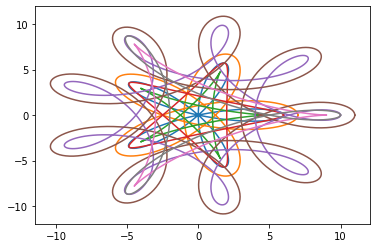

In [ ]:
### BEGIN Solution (do not delete this comment)
for R in [5, 9]:
  for r in [2, 3]:
    for d in [3, 4]:
      t = np.linspace(0, 2 * np.pi * r / math.gcd(r, R), 1000)
      x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
      y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)
      plt.plot(x, y)
plt.show() 
### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{20}, \tfrac14, \tfrac12, 1, 1.5, 2, 5, 10, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

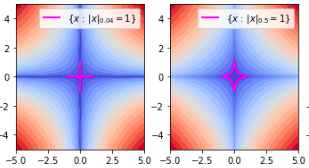

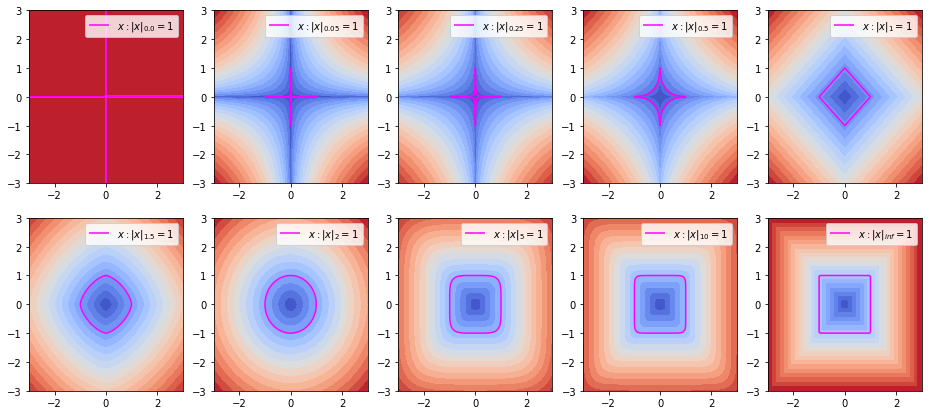

In [ ]:
p_values = [0., 0.05, 0.25, 0.5, 1, 1.5, 2, 5, 10, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(16, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution (do not delete this comment)
    ln = np.linalg.norm(np.stack([xx, yy]), axis=0, ord=p)
    lp = ax.contourf(xx, yy, ln, cmap='coolwarm', levels=20)
    label = r'$x:\|x\|_{' + str(p) +'} = 1$'
    unit_ball = ax.contour(xx, yy, ln, colors='magenta', levels=[1]).collections[0]
    ax.legend([unit_ball], [label])
    ### END Solution (do not delete this comment)
plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [ ]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise, random_state=0xC0FFEE)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xC0FFEE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

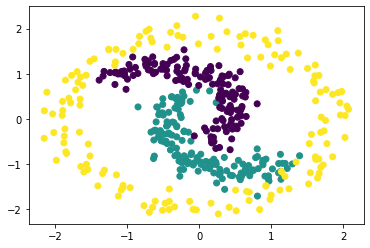

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 20$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $5$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![image](/content/drive/MyDrive/MSc/ML/HW_1/data/ex.png)

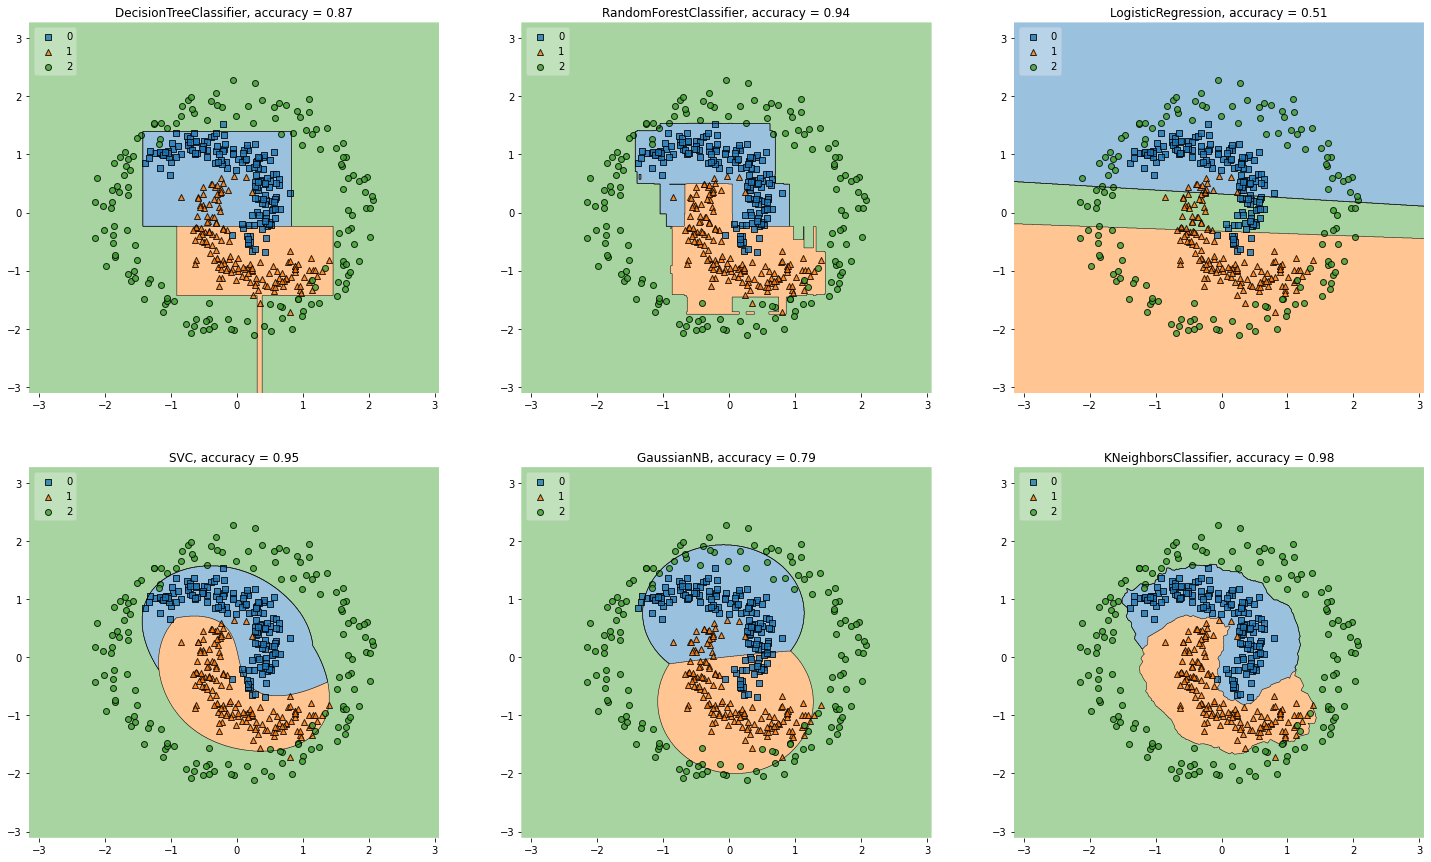

In [ ]:
### BEGIN Solution (do not delete this comment)
fig = plt.figure(figsize=(25, 15))

classifiers = [
    DecisionTreeClassifier(max_depth=4, random_state=0xC0FFEE),
    RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0xC0FFEE, n_jobs=-1),
    LogisticRegression(random_state=0xC0FFEE, n_jobs=-1),
    SVC(kernel='rbf', random_state=0xC0FFEE),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
]

for ind, clf in enumerate(classifiers):
    clf.fit(X, y)
    ax = plt.subplot(2, 3, ind + 1)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    acr = clf.score(X, y)
    plt.title(f'{type(clf).__name__}, accuracy = {acr:.2f}')
### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

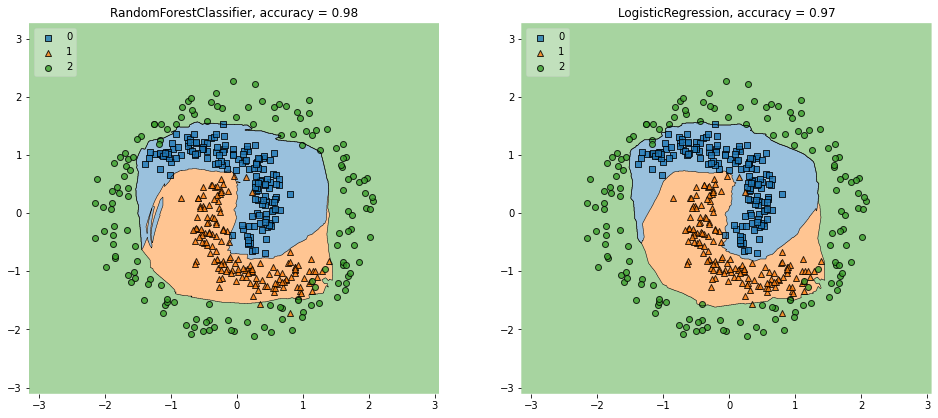

In [ ]:
### BEGIN Solution (do not delete this comment)
fig = plt.figure(figsize=(25, 15))

classifiers = [
    RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0xC0FFEE, n_jobs=-1),
    LogisticRegression(random_state=0xC0FFEE, n_jobs=-1)
]

pipeline = [
    [
        ('pf', PolynomialFeatures(degree=5)),
        ('dim', GaussianRandomProjection(n_components=10)),
        ('clf', clf)
    ],
    [
        ('pf', PolynomialFeatures(degree=4)),
        ('clf', clf)
    ]    
]

for ind, tmp in enumerate(zip(classifiers, pipeline)):
    clf, step = tmp 
    pipe = Pipeline(steps=step)
    pipe.fit(X, y)
    ax = plt.subplot(2, 3, ind + 1)
    fig = plot_decision_regions(X=X, y=y, clf=pipe, legend=2)
    acr = pipe.score(X, y)
    plt.title(f'{type(clf).__name__}, accuracy = {acr:.2f}')
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

- Random Forest: We can use polynomial features to add more features. Then, using Gaussian random projection, project the input data into a lower-dimensional feature space, as Gaussian projection can remove certain correlated features created by polynomial features.
- Logistic Regression: It is obviously that decision boundary is not linear, so we should use polynomial features to transfer the original features into higher-order conditions.

## Task 5. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [ ]:
data = pd.read_csv('concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength
n = len(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
569,381.4,0.0,0.0,185.7,0.0,1104.6,784.3,28.0,22.49
637,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,7.0,26.06
1016,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28.0,15.09


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please note that both in Task 4 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data).

In this problem, we do a step further and split the whole data into the **train part** (on which we train), **validation part** (on which we tune hyperparameters) and **test part** (where we compute the final test score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 5.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the validation data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the train score, the validation score and the test score (use the model with best hyperparameters refitted on the train set).

In [ ]:
### BEGIN Solution (do not delete this comment)
classifiers = [
    ExtraTreesRegressor(random_state=0xC0FFEE, n_jobs=-1),
    RandomForestRegressor(random_state=0xC0FFEE, n_jobs=-1)
]

params_list = {
    'max_features': np.arange(4, X_train.shape[1] + 1),
    'n_estimators': np.linspace(50, 150, 20, dtype=int),
    'min_samples_split': np.arange(3, 10, 1),
}

print("Ensemble Classifier\t Train\t Valid\t Test")
for reg in classifiers:

    gs = GridSearchCV(reg, param_grid=params_list, n_jobs=-1, scoring ='neg_mean_squared_error', return_train_score=True)
    gs.fit(X_val, y_val)

    best_reg = reg.__class__(**gs.best_params_)

    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    train_score = round(mse(y_train, best_reg.predict(X_train)), 2)

    y_pred = best_reg.predict(X_val)
    val_score = round(mse(y_val, best_reg.predict(X_val)), 2)

    y_pred = best_reg.predict(X_test)
    test_score = round(mse(y_test, best_reg.predict(X_test)), 2)      

    print("{}\t {}\t {}\t {}".format(type(reg).__name__, train_score, val_score, test_score))
### END Solution (do not delete this comment)

Ensemble Classifier	 Train	 Valid	 Test
ExtraTreesRegressor	 1.88	 16.71	 22.3
RandomForestRegressor	 6.71	 21.61	 27.38


### Subproblem 5.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:
- Val MSE > Train MSE, because we select the best hyperparameters by using GridSearchCV, study them on validation data, and then train them on training data. \
Test MSE > Train MSE, because test data is unused during the training period and it likely due to overfitting.
- Extra Trees Regressor performs better on the training set because it uses the means of random splitting at each node, which might decrease the variance. Additionally,  it uses the full original learning sample, which might reduce bias better than the bootstrapped samples of Random Forest.

## Task 6. Boosting (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step.

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your\_accuracy} - \text{sklearn\_accuracy}| \leq 0.005
\,. $$

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
### Plot the dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=0xC0FFEE)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

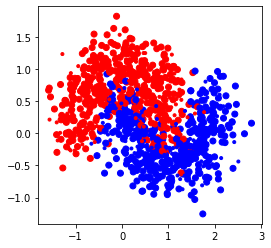

In [ ]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 6.1. AdaBoost alphas and distributions (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [ ]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    result_signum = (y * y_pred_t <=0) 
    N = np.sum(distribution * result_signum) 
    alpha = 1/2 * np.log((1 - N) / N) 
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    distribution = distribution * np.exp(-alpha_t * y * y_pred_t) / np.sum(distribution)
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 6.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [ ]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            # make a prediction
            y_pred = self.classifiers[-1].predict(X)

            # update alphas, append new alpha to self.alphas
            new_alpha = self.get_alpha(y, y_pred, distribution)
            self.alphas.append(new_alpha)
            
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred, distribution, new_alpha)
            
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        #get the weighted votes of the classifiers
        for i in range(self.n_estimators):
            final_predictions += self.classifiers[i].predict(X) * self.alphas[i]

        out = np.sign(final_predictions)
        
        ### END Solution (do not delete this comment)

        return out

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [ ]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.9
accuracy ada_boost_sklearn: 0.89


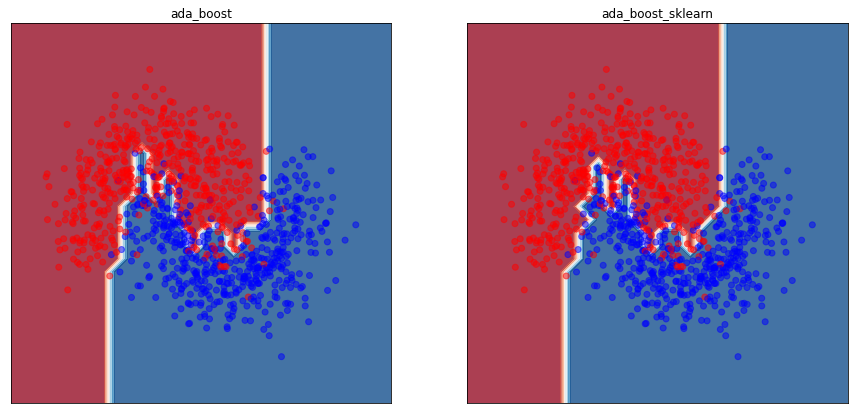

In [ ]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 7. Gradient Boosting (1 point)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0xC0FFEE)

FileNotFoundError: ignored

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances. 

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Training time for xgb: 0.6804169400002138
Training time for forest: 0.4954981900000348
Average precision score for XGBoost: 0.7017156427158183
Average precision score for Random Forest: 0.713514252851925


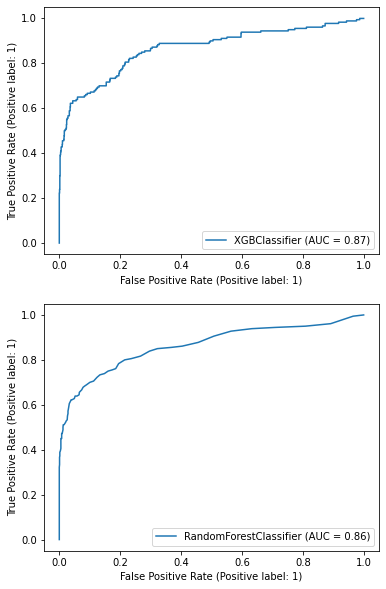

In [ ]:
### BEGIN Solution (do not delete this comment)
t1 = time.perf_counter()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print(f'Training time for xgb: {time.perf_counter() - t1}')

t2 = time.perf_counter()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f'Training time for forest: {time.perf_counter() - t2}')

xgb_precision = average_precision_score(y_test, xgb.predict_proba(X_test)[:,1], average=None)
rf_precision = average_precision_score(y_test, rf.predict_proba(X_test)[:,1], average=None)

print(f'Average precision score for XGBoost: {xgb_precision}')
print(f'Average precision score for Random Forest: {rf_precision}')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))
plot_roc_curve(xgb, X_test, y_test, ax = ax1)
plot_roc_curve(rf, X_test, y_test, ax=ax2);
### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

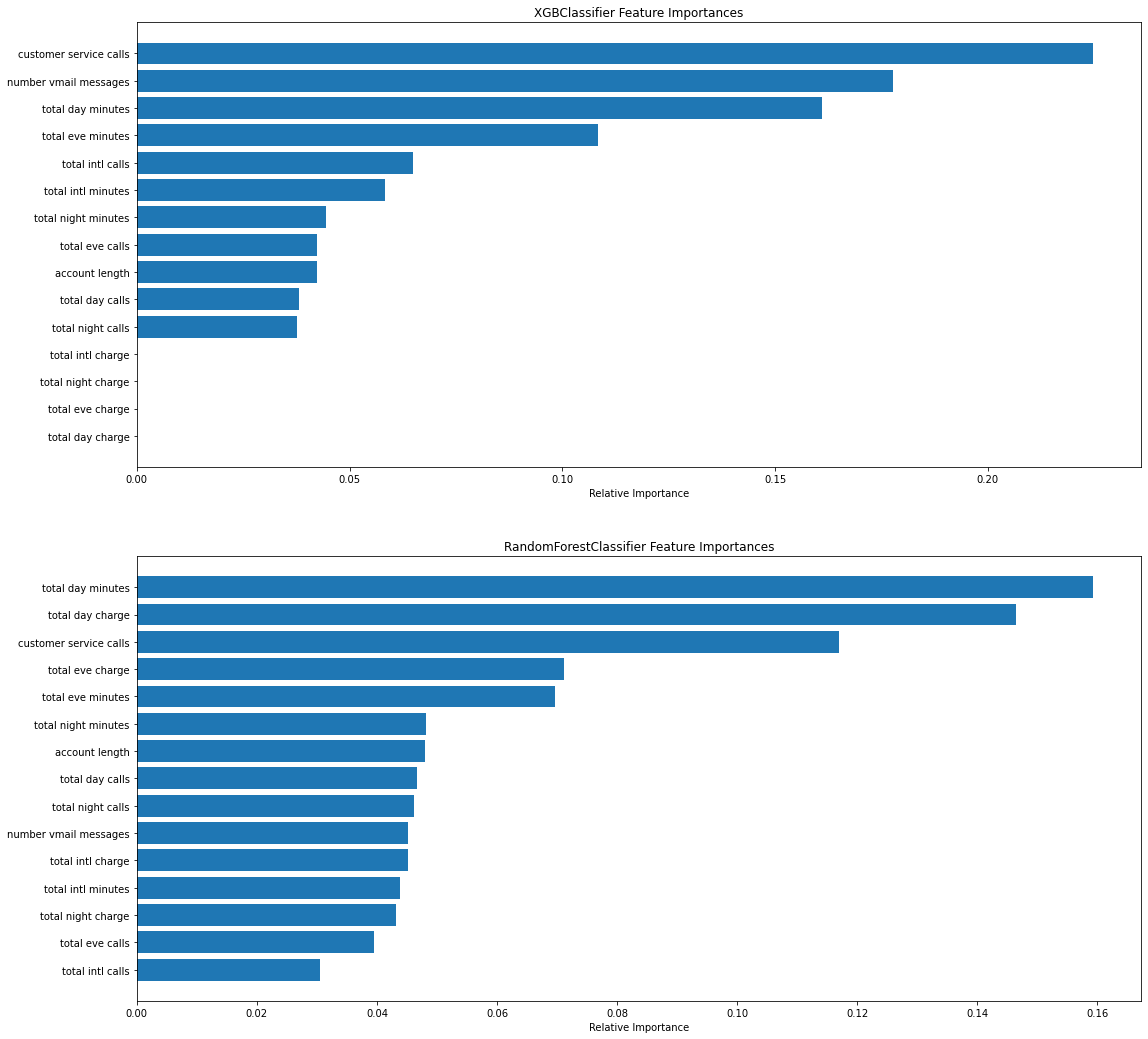

In [ ]:
### BEGIN Solution (do not delete this comment)
def plot_importance(estimator,ax):
    if type(estimator) == xgboost.sklearn.XGBClassifier:
        feature_names = np.array(estimator.get_booster().feature_names)
    else:
        feature_names = np.array(estimator.feature_names_in_)
    sorted_idx = estimator.feature_importances_.argsort()
    ax.barh(feature_names[sorted_idx], estimator.feature_importances_[sorted_idx])
    ax.set_title(f'{estimator.__class__.__name__} Feature Importances')
    ax.set_xlabel('Relative Importance')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 18))
plot_importance(xgb, ax1)
plot_importance(rf, ax2)
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

Because XGBoost and Random Forest are different types of classifiers, the importance of features can differ.
- When there are several correlated features, one is chosen and used in several trees during XGboosting. Other correlated features will not be used often or at all. So that, there exist features with zero importance.
- Random Forest due to the randomness in features given to every tree. Each correlated object may have a chance to be selected in one of the trees. The whole model will use all features. Hence, feature importance exists; it might be small, but not zero.

In [ ]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Task 8. Model and feature selection problem (3 points)

Your goal in this task is to predict the price (```price_doc```) given some characteristics of a house. In order to do that, you will demonstrate your abilities in data preprocessing, finding feature importances, applying different ML models.

### Subproblem 8.1. Data preprocessing and feature importances (1 point)

The goal of this subproblem is to prepare the data for further usage. Complete all of the following subtasks:

**8.1.1) load the dataset `./data/data_fs.csv`**

In [ ]:
### BEGIN Solution (do not delete this comment)
df = pd.read_csv('data_fs.csv') 
### END Solution (do not delete this comment)

**8.1.2) preprocess the dataset by dropping the ```timestamp``` feature, filling ```NaN```s with 0, converting the categorical variables into dummy variables**

In [ ]:
### BEGIN Solution (do not delete this comment)
df.drop('timestamp', axis = 1, inplace=True)
df.fillna(0, inplace=True)
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns = cat_cols)
target = 'price_doc'
y = df[target]
X = df.drop(columns=target)
n_features = X.shape[1]
print(n_features)
### END Solution (do not delete this comment)

560


**8.1.3) define ```x_train```, ```x_test```, ```y_train```, ```y_test```. The train-test split should be 70:30**


In [ ]:
### BEGIN Solution (do not delete this comment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0xC0FFEE)
### END Solution (do not delete this comment)


**8.1.4) plot the histogram of y values. Note that the mean of these values is very high and the distribution of the values is far from normal. Create ```y_train_log``` and ```y_test_log``` by applying $log_{y}$. Now plot the new histogram of the obtained values. You should use these log values for the next subtasks.**   

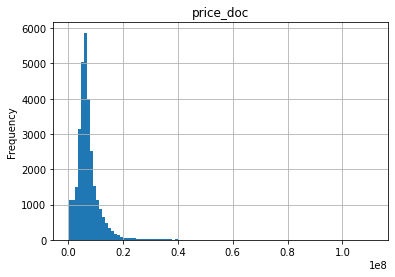

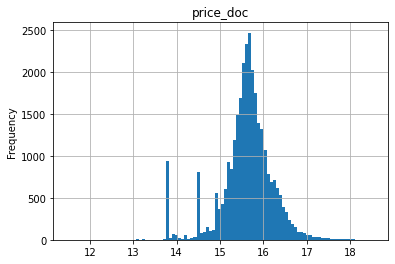

In [ ]:
### BEGIN Solution (do not delete this comment)
y.plot(kind='hist', bins=100, title='price_doc', grid=True)
plt.show()
np.log(y).plot(kind='hist', bins=100, title='price_doc',grid=True)
plt.show()
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
### END Solution (do not delete this comment)

**8.1.5) print the number of features in the created ```x_train``` and ```x_test``` datasets. Answer the question: do you think all of these features are relevant for the adequate price prediction?**


In [ ]:
### BEGIN Solution (do not delete this comment)
print(f'Train size = {X_train.shape}')
print(f'Test size = {X_test.shape}')
### END Solution (do not delete this comment)

Train size = (21329, 560)
Test size = (9142, 560)


**Your text answer (do not delete this comment)**:

The number of features is so large that I do not think we need all of them for an accurate price prediction.

There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

**8.1.6) use random forest to find the importance of the features. Plot the histogram of the importances.**

(array([448.,  72.,  27.,   7.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00238096, 0.00476192, 0.00714288, 0.00952384,
        0.0119048 , 0.01428575, 0.01666671, 0.01904767, 0.02142863,
        0.02380959, 0.02619055, 0.02857151, 0.03095247, 0.03333343,
        0.03571439, 0.03809535, 0.04047631, 0.04285726, 0.04523822,
        0.04761918, 0.05000014, 0.0523811 , 0.

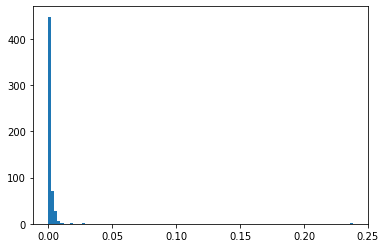

In [ ]:
### BEGIN Solution (do not delete this comment)
rf = RandomForestRegressor(random_state=0xC0FFEE, n_jobs=-1)
rf.fit(X_train, y_train_log)
plt.hist(rf.feature_importances_, bins=100)
### END Solution (do not delete this comment)

**8.1.7) print the names of the 20 most important features**

In [ ]:
### BEGIN Solution (do not delete this comment)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(20)
### END Solution (do not delete this comment)

full_sq                       0.238096
num_room                      0.027107
cafe_count_2000               0.026225
sport_count_3000              0.017022
cafe_count_3000               0.011631
cafe_count_5000_price_2500    0.011052
metro_km_avto                 0.008857
micex_cbi_tr                  0.008256
kindergarten_km               0.007887
brent                         0.007516
cafe_count_5000               0.007271
exhibition_km                 0.007263
public_healthcare_km          0.007210
micex                         0.006949
big_road1_km                  0.006662
floor                         0.006612
ttk_km                        0.006205
additional_education_km       0.006179
workplaces_km                 0.006163
eurrub                        0.006137
dtype: float64

<br>

### Subproblem 8.2. Training models on the most important features (1 point)

In this subproblem, you will train several ML models on the found 20 most important features: train **Linear Regression**,  **Ridge regression**, **Random forest**,  **DecisionTree** and evaluate their performance using the Root Mean Squared Logarithmic Error (RMSLE) on both train/test sets. 

You will have to repeat the same actions in the next tasks too, so we recommend to implement
a dedicated function for comparisons, which
1. it takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)` as the input;
2. it trains **all of the listed models** on the `(X_train, y_train)` sample;
3. it computes and returns a table with the RMSLE score of each fitted model on the train and test datasets.

**8.2.1) Implement the function described above**

In [ ]:
### BEGIN Solution (do not delete this comment)
def get_scores(X_train, y_train, X_test, y_test):
    classifiers = [
        LinearRegression(n_jobs = -1),
        Ridge(),
        RandomForestRegressor(random_state=0xC0FFEE, n_jobs = -1),
        DecisionTreeRegressor(random_state=0xC0FFEE)
    ]
    df = pd.DataFrame({
        'Method': [],
        'Train error': [],
        'Test error': []    
    }) 
    for model in classifiers:
        model.fit(X_train, y_train)
        train_error = msle(model.predict(X_train), y_train, squared=False)
        test_error = msle(model.predict(X_test), y_test, squared=False)
        
        df_dict = {
            'Method': type(model).__name__, 
            'Train error': train_error, 
            'Test error': test_error
        }
        df = df.append(df_dict, ignore_index=True)

    return df
### END Solution (do not delete this comment)

**8.2.2) Apply the implemented function to our dataset (use only the 20 most important features)**

In [ ]:
### BEGIN Solution
best_features = feature_importances.nlargest(20).index
get_scores(X_train[best_features], y_train_log, X_test[best_features], y_test_log)
### END Solution

,Method,Train error,Test error
0,LinearRegression,0.032098,0.032996
1,Ridge,0.032098,0.032996
2,RandomForestRegressor,0.011101,0.030174
3,DecisionTreeRegressor,0.000037,0.041812


<br>

### Subproblem 8.3. Forward-backward methods (1 point)
In the subproblems above, we have relied on the feature importances found by the random forest method. The main goal of this subproblem is to find them by appling the forward-backward methods: the main idea is to add or remove features and compute how this removal influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

In subtasks 8.3.1 - 8.3.3, implement the following greedy feature selection algorithm with early stopping using the mean of the RMSLE scores achieved on the 3-fold cross-validation. Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is** and look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html) for more information.

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unused* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

**8.3.1) In the cell below, you have to implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model's "quality".** 

In [ ]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    features = X.columns
    for feature in features:
        if feature not in used_features:
            new_features = used_features + [feature]
            scorer = make_scorer(msle, greater_is_better = False)
            scores[feature] = np.abs(np.mean(cross_val_score(model, X[new_features], y, scoring= scorer, cv=cv)))
    ### END Solution

    return scores

**8.3.2) Implement a forward greedy feature selection function (the one described in the pseudocode in the subtask 1 above) that would**

**- compute the model's "quality" over currently *unused* features**

**- find the feature, which has given the best score and add to the list of the currently *used* features**

**- if the model's quality has increased since the last round, add this feauture to the list of the best features and  print the best score and the current best features list**

**Do not forget to implement the early stopping.**

In [ ]:
def forward_steps(X, y, n_rounds, model):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        model: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    non_used_features = []
    curr_round = 0
    curr_rmsle = np.inf
    while curr_round < n_rounds:
        if len(X.columns) == len(feat_best_list) + len(non_used_features):
            break
        else:
            curr_score = selection_step(model, X, y, feat_best_list + non_used_features, cv=3)
            best_feature = min(curr_score, key= curr_score.get)
            best_value = curr_score[best_feature]
            if best_value <= curr_rmsle:
                curr_rmsle = best_value
                feat_best_list.append(best_feature)
                curr_round = 0
            else:
                curr_round +=1
                non_used_features.append(best_feature)
    ### END Solution
    
    return feat_best_list


**8.3.3) Use the function implemented above + DecisionTreeRegressor to get the best features according to this algorithm. (HINT: Use ```n_rounds = 2```)**

In [ ]:
### BEGIN Solution
features = forward_steps(X_train, y_train_log, n_rounds=2, model = DecisionTreeRegressor(random_state=0xC0FFEE))
print(features)
### END Solution

['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'modern_education_share_0', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Hamovniki', 'sub_area_Poselenie Filimonkovskoe', 'sub_area_Ivanovskoe', 'sub_area_Vojkovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Poselenie Moskovskij', "sub_area_Altuf'evskoe", 'sub_area_Juzhnoportovoe', 'sub_area_Nagatinskij Zaton', 'sub_area_Poselenie Shherbinka', "sub_area_Zamoskvorech'e", 'sub_area_Horoshevskoe', "sub_area_Sokol'niki", 'sub_area_Poselenie Pervomajskoe', 'sub_area_Poselenie Voronovskoe', 'sub_area_Poselenie Rogovskoe', 'sub_area_Poselenie Shhapovskoe', 'old_education_build_share_0', 'sub_area_Severnoe']


**8.3.4) Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.**

In [ ]:
### BEGIN Solution  
get_scores(X_train[features], y_train_log, X_test[features], y_test_log)
### END Solution

,Method,Train error,Test error
0,LinearRegression,0.033307,0.033982
1,Ridge,0.033307,0.033981
2,RandomForestRegressor,0.028646,0.031376
3,DecisionTreeRegressor,0.028545,0.031683


<br>

## Task 9. Multi-Class Classification Strategies (1 point)
In this task, you will deal with the multiclass classification problem for the Glass Classification Data. Let's load the dataset.

In [ ]:
data = pd.read_csv('glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
94,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.00,0.00,2
114,1.51847,13.10,3.97,1.19,72.44,0.60,8.43,0.00,0.00,2


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [ ]:
### BEGIN Solution (do not delete this comment)
classifiers = [
    DecisionTreeClassifier(max_depth=7, random_state=0xC0FFEE),
    RandomForestClassifier(max_depth=3, random_state=0xC0FFEE, n_estimators=100, n_jobs=-1),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    LogisticRegression(n_jobs=-1)
]

strategies_list = [None, OneVsOneClassifier, OneVsRestClassifier]

cols = pd.Series([type(clf).__name__ for clf in classifiers])
rows = pd.Index(['Multiclass', 'OneVsRest', 'OneVsOne'])

scores_dict, time_dict = {}, {}

for st in strategies_list:
    for clf in classifiers:
        clf_obj = clf if st is None else st(clf, n_jobs=-1) 
        t = time.perf_counter()       
        score = cross_val_score(clf_obj, X, y, cv=5, n_jobs=-1, scoring='balanced_accuracy').mean()
        
        if st is None:
            scores_dict[type(clf).__name__] = [score]
            time_dict[type(clf).__name__] = [time.perf_counter() - t]
        else:
            scores_dict[type(clf).__name__].append(score) 
            time_dict[type(clf).__name__].append(time.perf_counter() - t)
        
scores_report = pd.DataFrame(data=scores_dict, index=rows)
time_report = pd.DataFrame(data=time_dict, index=rows)

print('Cross validation scores:')
display(scores_report)

print('\nTraining Duration (CV=5):')
display(time_report)

### END Solution (do not delete this comment)

Cross validation scores:


,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.530040,0.514583,0.551071,0.445040
OneVsRest,0.696369,0.591905,0.554921,0.432480
OneVsOne,0.581627,0.560456,0.575159,0.385298



Training Duration (CV=5):


,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.040982,0.692070,0.051337,0.178883
OneVsRest,0.108867,10.452933,0.735428,1.949304
OneVsOne,0.126876,3.739281,0.180678,0.662684


**Which metric did you choose to optimize during cross validation and why? Explain**

In [ ]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

**Your text answer (do not delete this comment)**:

I choose 'balanced accuracy' because there is imbalance in target with two most common classes have 76, 70 samples while others classes have a much smaller number of samples. 

**For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?**

**Your text answer (do not delete this comment)**:

For decision tree classifier the usage of OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time. 

# Task 10. Stacking (2 points)

Stacking is an ensembling approach, which combines several algorithms (base models) to get better results. This is achieved by **a)** training the base models (any ML models) on the initial train data (or parts of the train data, see the paragraph below), **b)** training the meta-model (also an ML model) on the predictions of those base models.

One of the main problems of stacking is overfitting. To avoid it, when evaluating the performance of the meta-model on the train set, the training data is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models. The $ n $ -th fold is used for the overall prediction (calculating the meta-factor) in the following manner: the predictions on the $ n $ -th fold are made by the base models (already trained on the rest of the dataset), then these predictions are fed as inputs to the meta-model.

When evaluating the performance of the meta-model on the test set, there can be used various approaches$.^{[1]}$ For example, in order, to obtain meta-factors for the test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers (once again, as it is said in the paragraph above, if we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained).  

You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.S. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer ([source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning)). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  

**Your task will be:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models (base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml, features e.t.c) and train them.
* Report individual accuracy on test set for each of the models.
* Train the metaclassifier on the original datasets features, report score on test.
* Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.
* Does stacking help to gain better score?

For this task we will use the dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). Split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [ ]:
from sklearn import datasets
fc = sklearn.datasets.fetch_covtype()

Write meta classifier function.

In [ ]:
from sklearn.model_selection import cross_val_predict

def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param y_train: numpy array or pandas table, test set.
    :param cv: number of cross-validation folds.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    train_pred = []
    for clf in base_clfs:
        y_pred = cross_val_predict(clf, X_train, y_train, n_jobs=-1, cv=cv)
        train_pred.append(y_pred)
    final_classifier.fit(np.vstack(train_pred).T, y_train)
    y_train_pred = final_classifier.predict(np.vstack(train_pred).T)

    test_pred = []
    for clf in base_clfs:
        clf.fit(X_train, y_train)
        test_pred.append(clf.predict(X_test))
    y_test_pred = final_classifier.predict(np.vstack(test_pred).T)
    return y_train_pred, y_test_pred, final_classifier
    ### END Solution (do not delete this comment)
    pass

### Subproblem 10.1 (1 point)

**10.1.1) Chose 6 different base models (base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them.**

In [ ]:
### BEGIN Solution (do not delete this comment)
x_train, x_test, y_train, y_test = train_test_split(fc.data, fc.target, test_size=0.4, random_state=0xC0FFEE)

classifiers = [
    XGBClassifier(random_state=0xC0FFEE, n_jobs=-1),
    LogisticRegression(n_jobs=-1),
    RandomForestClassifier(max_depth=4, random_state=0xC0FFEE, n_estimators=100, n_jobs=-1),
    DecisionTreeClassifier(max_depth=8, random_state=0xC0FFEE),
    DecisionTreeClassifier(max_depth=4, random_state=0xC0FFEE),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=0xC0FFEE), algorithm="SAMME", n_estimators=100)
]

for clf in classifiers:
    clf.fit(x_train, y_train)
### END Solution (do not delete this comment)

**10.1.2) Report individual scores on test set. As a score use accuracy.**

In [ ]:
### BEGIN Solution (do not delete this comment)
accur_list = []

for clf in classifiers:
    y_pred = clf.predict(x_test)
    accur_list.append(accuracy_score(y_pred, y_test))
    print(f'accuracy of {type(clf).__name__} on test:', accur_list[-1])
### END Solution (do not delete this comment)

accuracy of XGBClassifier on test: 0.7452765646178008
accuracy of LogisticRegression on test: 0.6227619887696048
accuracy of RandomForestClassifier on test: 0.6672016522880316
accuracy of DecisionTreeClassifier on test: 0.7455734601234913
accuracy of DecisionTreeClassifier on test: 0.7003205610894774
accuracy of AdaBoostClassifier on test: 0.6238721197908823


### Subproblem 10.2 (1 point)

**10.2.1) Train metaclassifier on original datasets features. And report score on test.**

In [ ]:
### BEGIN Solution (do not delete this comment)
best_clf = classifiers[np.argmax(accur_list)]
print(f' accuracy of metaclassifier ({best_clf}) on original datasets features on test:', np.max(accur_list))
final_clf = sklearn.base.clone(best_clf)
### END Solution (do not delete this comment)

 accuracy of metaclassifier (DecisionTreeClassifier(max_depth=8, random_state=12648430)) on original datasets features on test: 0.7455734601234913


**10.2.2) Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.**

In [ ]:
### BEGIN Solution (do not delete this comment)
y_train_pred, y_test_pred, final_classifier = meta_classifier(classifiers, final_clf, x_train, x_test, y_train, cv=5)
print(f'accuracy of metaclassifier ({type(final_clf).__name__}) on original datasets features on test:', accuracy_score(y_test_pred, y_test))
### END Solution (do not delete this comment)

accuracy of metaclassifier (DecisionTreeClassifier) on original datasets features on test: 0.7634173102988318


**10.2.3) Does stacking helped to gain better score?**

**Your text answer (do not delete this comment)**:

Yes, stacking helped to gain better score (from 0.746 to 0.763)